In [1]:
import pandas as pd

# 파일 경로
oil_path = 'C:/Users/82106/Desktop/경영캡스톤/data2/preprocessed_BrentOilPrices.csv'
gold_path = 'C:/Users/82106/Desktop/경영캡스톤/data2/preprocessed_gold.csv'
nasdaq_path = 'C:/Users/82106/Desktop/경영캡스톤/data2/preprocessed_nasdaq.csv'


In [2]:
# 데이터 로드
oil_data = pd.read_csv(oil_path)
gold_data = pd.read_csv(gold_path)
nasdaq_data = pd.read_csv(nasdaq_path)

# 각 데이터의 상위 5개 행 확인
oil_head = oil_data.head()
gold_head = gold_data.head()
nasdaq_head = nasdaq_data.head()

oil_head, gold_head, nasdaq_head


(         Date  Price
 0  2000-01-04  23.95
 1  2000-01-05  23.72
 2  2000-01-06  23.55
 3  2000-01-07  23.35
 4  2000-01-10  22.77,
          Date   Open   High    Low  Close  Volume Currency
 0  2000-01-04  289.5  289.5  280.0  283.7   21621      USD
 1  2000-01-05  283.7  285.0  281.0  282.1   25448      USD
 2  2000-01-06  281.6  282.8  280.2  282.4   19055      USD
 3  2000-01-07  282.5  284.5  282.0  282.9   11266      USD
 4  2000-01-10  282.4  283.9  281.8  282.7   30603      USD,
          Date       Open       High        Low      Close  Adj Close    Volume
 0  2004-01-02  36.660000  36.790001  36.220001  36.360001  31.140272  55234100
 1  2004-01-05  36.580002  37.160000  36.560001  37.090000  31.765478  69717900
 2  2004-01-06  37.080002  37.419998  36.950001  37.340000  31.979589  60033000
 3  2004-01-07  37.279999  37.680000  37.070000  37.680000  32.270798  71830000
 4  2004-01-08  37.849998  38.000000  37.599998  37.980000  32.527729  76800900)

### 데이터 전처리

In [3]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

#날짜 열 datetime 형식으로 변환하고 인덱스로 설정
oil_data['Date']=pd.to_datetime(oil_data['Date'])
oil_data.set_index('Date',inplace=True)

In [4]:
#오일 데이터 adf 테스트 수행

adf_test_oil=adfuller(oil_data['Price'])

adf_test_oil

(-2.388588639806595,
 0.14498311772957867,
 29,
 5781,
 {'1%': -3.431481673763484,
  '5%': -2.8620400923019074,
  '10%': -2.5670361971807805},
 20865.104413166937)

In [5]:
#Gold Prices 데이터 날짜형 준비
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
gold_data.set_index('Date', inplace=True)

#adf 테스트
adf_test_gold=adfuller(gold_data['Close'])

adf_test_gold

(-0.9537653625464473,
 0.769751816277414,
 11,
 5691,
 {'1%': -3.4314995786368088,
  '5%': -2.86204800302548,
  '10%': -2.567040408291401},
 44958.35262136224)

In [6]:
#나스닥 데이터 날짜형 준비
nasdaq_data['Date']=pd.to_datetime(nasdaq_data['Date'])
nasdaq_data.set_index('Date',inplace=True)

In [7]:
#나스닥 adf 테스트
adf_test_nasdaq=adfuller(nasdaq_data['Close'])
adf_test_nasdaq

(1.3176135041580894,
 0.9967057570565306,
 26,
 4954,
 {'1%': -3.431670688657576,
  '5%': -2.862123600382394,
  '10%': -2.567080651396155},
 22304.389443408003)

In [8]:
##정상성 만들기
# 각 데이터 차분 수행

oil_diff=oil_data['Price'].diff().dropna()
gold_diff=gold_data['Close'].diff().dropna()
nasdaq_diff=nasdaq_data['Close'].diff().dropna()

In [9]:
#차분된 데이터에 대해 adf 테스트
adf_test_oil_diff=adfuller(oil_diff)
adf_test_gold_diff=adfuller(gold_diff)
adf_test_nasdaq_diff=adfuller(nasdaq_diff)

adf_test_oil_diff, adf_test_gold_diff, adf_test_nasdaq_diff

((-12.401528931241709,
  4.5493891144339745e-23,
  28,
  5781,
  {'1%': -3.431481673763484,
   '5%': -2.8620400923019074,
   '10%': -2.5670361971807805},
  20866.279484153365),
 (-23.641132785478053,
  0.0,
  10,
  5691,
  {'1%': -3.4314995786368088,
   '5%': -2.86204800302548,
   '10%': -2.567040408291401},
  44950.050729345705),
 (-15.599140571861145,
  1.8386511945321832e-28,
  25,
  4954,
  {'1%': -3.431670688657576,
   '5%': -2.862123600382394,
   '10%': -2.567080651396155},
  22300.618310542264))

통계량, p값, 지연값 수, 실제 데이터 포인트 수, 각 유의수준에서의 정상성 여부

모든 유의수준에서 정상성을 가짐

##### ACF ,PACF 플롯

C:\Users\82106\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


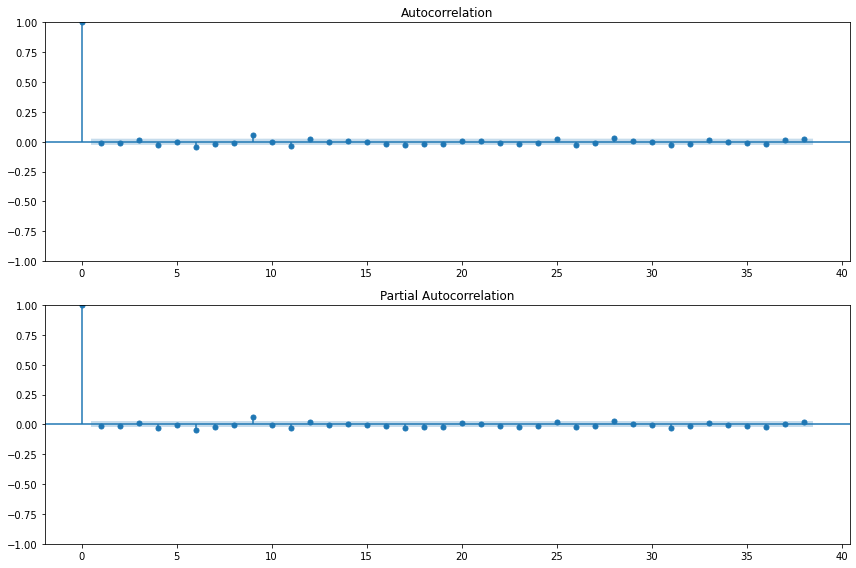

In [10]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 금가격 대한 acf 와 pacf 플롯
fig,ax = plt.subplots(2,1,figsize=(12,8))

plot_acf(gold_diff,ax=ax[0])
plot_pacf(gold_diff,ax=ax[1])

plt.tight_layout()
plt.show()

C:\Users\82106\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


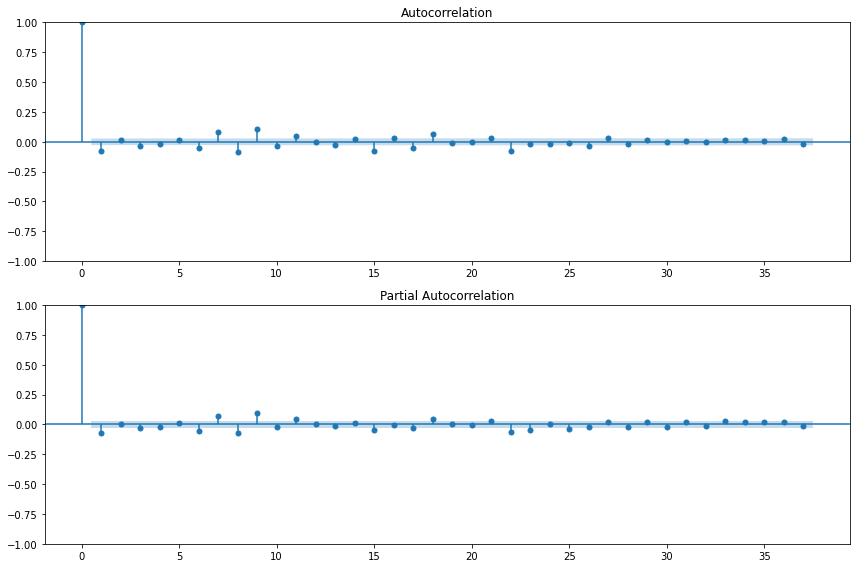

In [11]:
# NASDAQ 데이터에 대한 ACF와 PACF 플롯
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(nasdaq_diff, ax=ax[0])
plot_pacf(nasdaq_diff, ax=ax[1])

plt.tight_layout()
plt.show()

In [12]:
from statsmodels.tsa.arima.model import ARIMA

In [13]:
#오일가격에 대해 ARIMA 모델 생성, 학습
#1개의 시차, 1번 차분 , 이전 1개의 시차의오차 고려
model_oil=ARIMA(oil_data['Price'],order=(1,1,1))
model_oil_fit=model_oil.fit()

C:\Users\82106\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\82106\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\82106\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [14]:
model_oil_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                 5811
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10486.311
Date:                Mon, 13 Nov 2023   AIC                          20978.622
Time:                        02:29:50   BIC                          20998.624
Sample:                             0   HQIC                         20985.580
                               - 5811                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4174      0.218     -1.915      0.055      -0.845       0.010
ma.L1          0.4446      0.215      2.071      0.038       0.024       0.865
sigma2         2.1638      0.018    121.807      0.000       2.129       2.199
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):             17925.97
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               3.48   Skew:                            -0.56
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
# Gold Prices 데이터에 대한 ARIMA 모델 구축 및 적합
# 매개변수는 추정된 값을 기반으로 선택
model_gold = ARIMA(gold_data['Close'], order=(1, 1, 1))
model_gold_fit = model_gold.fit()

# 모델 요약 출력
model_gold_fit.summary()

C:\Users\82106\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\82106\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\82106\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 5703
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -22605.613
Date:                Mon, 13 Nov 2023   AIC                          45217.225
Time:                        02:29:51   BIC                          45237.171
Sample:                             0   HQIC                         45224.169
                               - 5703                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9317      0.029     32.457      0.000       0.875       0.988
ma.L1         -0.9440      0.026    -36.033      0.000      -0.995      -0.893
sigma2       162.5731      1.243    130.794      0.000     160.137     165.009
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             26595.94
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               8.78   Skew:                            -0.77
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

통계적으로 유의미, 잔차가 정규분포 X

In [16]:
# NASDAQ 데이터에 대한 ARIMA 모델 구축 및 적합
# 매개변수는 추정된 값을 기반으로 선택 (예: p=1, d=1, q=1)
model_nasdaq = ARIMA(nasdaq_data['Close'], order=(1, 1, 1))
model_nasdaq_fit = model_nasdaq.fit()

# 모델 요약 출력
model_nasdaq_fit.summary()

C:\Users\82106\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\82106\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\82106\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 4981
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -11283.922
Date:                Mon, 13 Nov 2023   AIC                          22573.845
Time:                        02:29:52   BIC                          22593.385
Sample:                             0   HQIC                         22580.695
                               - 4981                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2941      0.071     -4.160      0.000      -0.433      -0.156
ma.L1          0.2208      0.073      3.035      0.002       0.078       0.363
sigma2         5.4407      0.041    132.585      0.000       5.360       5.521
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             33727.42
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):              48.19   Skew:                            -0.57
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

통계적으로 유의미, 잔차가 정규분포 X

In [17]:
#각 자산에 대한 미래 5일 가격 예측
#변동성 파악 위해
#원유
oil_forecast=model_oil_fit.get_forecast(steps=5)
oil_forecast_summary=oil_forecast.summary_frame()

#금
gold_forecast=model_nasdaq_fit.get_forecast(steps=5)
gold_forecast_summary=gold_forecast.summary_frame()

#나스닥
nasdaq_forecast=model_nasdaq_fit.get_forecast(steps=5)
nasdaq_forecast_summary=nasdaq_forecast.summary_frame()

(oil_forecast_summary, gold_forecast_summary, nasdaq_forecast_summary)

C:\Users\82106\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\82106\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\82106\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


(Price       mean   mean_se  mean_ci_lower  mean_ci_upper
 5811   93.501890  1.470995      90.618792      96.384987
 5812   93.538666  2.108777      89.405540      97.671792
 5813   93.523316  2.584545      88.457701      98.588931
 5814   93.529723  2.988927      87.671534      99.387912
 5815   93.527049  3.343467      86.973974     100.080123,
 Close        mean   mean_se  mean_ci_lower  mean_ci_upper
 4981   369.038309  2.332523     364.466648     373.609970
 4982   369.147611  3.180066     362.914796     375.380426
 4983   369.115469  3.873615     361.523322     376.707616
 4984   369.124921  4.453288     360.396636     377.853206
 4985   369.122142  4.967674     359.385679     378.858604,
 Close        mean   mean_se  mean_ci_lower  mean_ci_upper
 4981   369.038309  2.332523     364.466648     373.609970
 4982   369.147611  3.180066     362.914796     375.380426
 4983   369.115469  3.873615     361.523322     376.707616
 4984   369.124921  4.453288     360.396636     377.853206
 

In [18]:
#각 자산의 예측 가격에 대한 표준편차 계산
#미래 가격 변동성을 수치적으로 평가
oil_volatility=oil_forecast_summary['mean_se'].mean()
gold_volatility=gold_forecast_summary['mean_se'].mean()
nasdaq_volatility=nasdaq_forecast_summary['mean_se'].mean()

oil_volatility, gold_volatility, nasdaq_volatility

(2.499342127620856, 3.761433354794069, 3.761433354794069)

In [19]:
#변동성 역수로 가중치 계산 -> 변동성이 낮은자산에 투자비중
weights_min_volatility={
    'oil':1/oil_volatility,
    'gold':1/gold_volatility,
    'nasdaq':1/nasdaq_volatility
}

In [20]:
#총합으로 나누어 가중치 정규화 
total_weight=sum(weights_min_volatility.values())
normalized_weights_min_volatility={k:v/total_weight for k,v in weights_min_volatility.items()}

In [21]:
normalized_weights_min_volatility

{'oil': 0.4293816044758223,
 'gold': 0.2853091977620889,
 'nasdaq': 0.2853091977620889}

In [22]:
# 각 자산의 수익률 계산
# 수익률 = (종가 / 시작가) - 1

oil_return = (oil_data['Price'].iloc[-1] / oil_data['Price'].iloc[0]) - 1
gold_return = (gold_data['Close'].iloc[-1] / gold_data['Close'].iloc[0]) - 1
nasdaq_return = (nasdaq_data['Close'].iloc[-1] / nasdaq_data['Close'].iloc[0]) - 1

In [23]:
# 변동성 최소화 포트폴리오의 가중치
weights_min_volatility = {
    "oil": 0.5608436764183737,
    "gold": 0.06649513351593095,
    "nasdaq": 0.37266119006569537
}

# 포트폴리오의 예상 수익률 계산
portfolio_expected_return = (
    weights_min_volatility["oil"] * oil_return +
    weights_min_volatility["gold"] * gold_return +
    weights_min_volatility["nasdaq"] * nasdaq_return
)

portfolio_expected_return

5.381628284489155

2000 ~ 2023 변동성 최소 포트폴리오 예상 수익률 538%

이후 1년동안의 예상수익률 계산

In [24]:
#각 자산의 현재 가격 정의
current_oil_price=oil_data['Price'].iloc[-1]
current_gold_price = gold_data['Close'].iloc[-1]
current_nasdaq_price = nasdaq_data['Close'].iloc[-1]

In [27]:
#1년 예상 수익률 예측모델 학습
oil_forecast_1year = model_oil_fit.get_forecast(steps=365)
gold_forecast_1year = model_gold_fit.get_forecast(steps=365)
nasdaq_forecast_1year = model_nasdaq_fit.get_forecast(steps=365)

C:\Users\82106\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\82106\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\82106\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [28]:
# 각 자산의 1년 예상 수익률 계산
oil_return_1year = (oil_forecast_1year.predicted_mean.iloc[-1] / current_oil_price) - 1
gold_return_1year = (gold_forecast_1year.predicted_mean.iloc[-1] / current_gold_price) - 1
nasdaq_return_1year = (nasdaq_forecast_1year.predicted_mean.iloc[-1] / current_nasdaq_price) - 1

oil_return_1year, gold_return_1year, nasdaq_return_1year


(-0.000664213769647537, 0.004547388729370994, -0.0007775395167756161)

In [29]:
# 각 자산의 1년 예상 수익률 계산
oil_return_1year = (oil_forecast_1year.predicted_mean.iloc[-1] / current_oil_price) - 1
gold_return_1year = (gold_forecast_1year.predicted_mean.iloc[-1] / current_gold_price) - 1
nasdaq_return_1year = (nasdaq_forecast_1year.predicted_mean.iloc[-1] / current_nasdaq_price) - 1


In [30]:
# 변동성 최소화 포트폴리오의 1년 예상 수익률 계산
portfolio_expected_return_1year = (
    weights_min_volatility["oil"] * oil_return_1year +
    weights_min_volatility["gold"] * gold_return_1year +
    weights_min_volatility["nasdaq"] * nasdaq_return_1year
)


In [31]:
portfolio_expected_return_1year

-0.0003598996734331744

변동성 최소 포트폴리오 1년 예상 수익률 -0.035%

In [32]:
# 1년 수익률이 가장 높은 포트폴리오 구성
highest_return = max(oil_return_1year, gold_return_1year, nasdaq_return_1year)
if highest_return == oil_return_1year:
    weights_high_return = {"oil": 1.0, "gold": 0.0, "nasdaq": 0.0}
elif highest_return == gold_return_1year:
    weights_high_return = {"oil": 0.0, "gold": 1.0, "nasdaq": 0.0}
else:
    weights_high_return = {"oil": 0.0, "gold": 0.0, "nasdaq": 1.0}
weights_high_return

{'oil': 0.0, 'gold': 1.0, 'nasdaq': 0.0}

1년 수익률 가장 높은 포트폴리오